# Импорт библиотек

In [ ]:
# Для работы с массивами данных
import numpy as np

# Для работы с табличными данными
import fireducks.pandas as pd # испольлзуем fireducks, как более быструю альтернативу pandas

# Библиотека утилит
from keras import utils

# Для работы с моделями
from keras.models import Sequential, Model

# Слои
from keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate
from keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D

# Оптимизаторы
from keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop

# Токенизатор
from tensorflow.keras.preprocessing.text import Tokenizer

# Нормализация данных
from sklearn.preprocessing import StandardScaler

# Регулярные выражения
import re

# Для работы с графиками
import matplotlib.pyplot as plt

# Метрики для расчета ошибок
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Для преобразования строки в json формат
import json

%matplotlib inline

# Загрузка данных

In [ ]:
!wget https://storage.yandexcloud.net/academy.ai/japan_cars_dataset.csv

--2025-02-08 05:51:33--  https://storage.yandexcloud.net/academy.ai/japan_cars_dataset.csv
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 136735 (134K) [text/csv]
Saving to: ‘japan_cars_dataset.csv’

japan_cars_dataset. 100%[===================>] 133.53K   245KB/s    in 0.5s    

2025-02-08 05:51:34 (245 KB/s) - ‘japan_cars_dataset.csv’ saved [136735/136735]



In [ ]:
# Чтение файла БД
cars = pd.read_csv('japan_cars_dataset.csv', sep=',')

# Удалим строки с пустыми значениями
cars = cars.dropna()

# Вывод формы данных
print('Форма данных: ', cars.shape)

Форма данных:  (2318, 11)


In [ ]:
# Выводим первые 10 машин
cars.head(10)

,Unnamed: 0,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
5,5,190,daihatsu,mira,2004,81400,660,at,2wd,rhd,gasoline
6,8,220,nissan,march,2010,117000,1200,at,2wd,rhd,gasoline
7,9,230,volkswagen,passat,2008,127763,3190,at,4wd,rhd,gasoline
8,10,275,mazda,bongo van,2010,178218,1800,mt,2wd,rhd,gasoline
9,11,283,honda,step wgn,2005,121655,2000,at,2wd,rhd,gasoline


In [ ]:
print(cars['transmission'].value_counts())

transmission
at     2171
mt      117
cvt      30
Name: count, dtype: int64


In [ ]:
print(cars['drive'].value_counts())

drive
2wd    2121
4wd     192
awd       5
Name: count, dtype: int64


In [ ]:
print(cars['hand_drive'].value_counts())

hand_drive
rhd       2301
lhd         16
center       1
Name: count, dtype: int64


In [ ]:
print(cars['fuel'].value_counts())

fuel
gasoline    2290
diesel        18
lpg            7
hybrid         2
cng            1
Name: count, dtype: int64


transmission, drive, hand_drive, fuel можно удалить, т.к. значения совпадают за исключением небольшого процента, что не отразится на всем объеме данных.

In [ ]:
# Удалим ненужные столбцы
cars.drop(['Unnamed: 0', 'transmission', 'drive', 'hand_drive', 'fuel'], inplace=True, axis=1)

In [ ]:
cars.head(10)

,price,mark,model,year,mileage,engine_capacity
0,80,nissan,march,2003,80000,1240
1,110,nissan,march,2010,53000,1200
2,165,nissan,lafesta,2005,47690,2000
3,190,toyota,avensis,2008,130661,1990
4,190,daihatsu,mira,2006,66300,660
5,190,daihatsu,mira,2004,81400,660
6,220,nissan,march,2010,117000,1200
7,230,volkswagen,passat,2008,127763,3190
8,275,mazda,bongo van,2010,178218,1800
9,283,honda,step wgn,2005,121655,2000


# Обработка данных

In [ ]:
# Пример данных
n = 3                                # Индекс в таблице машин
for i in range(len(cars.values[n])): # Вывод значения каждого столбца
    print('{} {:>20} {}'.format(i, cars.columns[i], cars.values[n][i]))

0                price 190
1                 mark toyota
2                model avensis
3                 year 2008
4              mileage 130661
5      engine_capacity 1990


In [ ]:
# Проверим Null значения
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price            2318 non-null   int64 
 1   mark             2318 non-null   object
 2   model            2318 non-null   object
 3   year             2318 non-null   int64 
 4   mileage          2318 non-null   int64 
 5   engine_capacity  2318 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 108.8+ KB


# Извлечение даных из классов

**Извлечение модели**

In [ ]:
print(cars['mark'].value_counts())

mark
toyota           1047
honda             382
nissan            320
mazda             148
suzuki            126
mitsubishi         65
daihatsu           56
subaru             54
volkswagen         52
bmw                27
hyundai             9
mercedes-benz       5
kia motors          4
isuzu               3
audi                3
smart               2
land rover          2
peugeot             2
volvo               2
kubota              1
chrysler            1
gm                  1
opel                1
citroen             1
mitsuoka            1
ford                1
hino                1
jaguar              1
Name: count, dtype: int64


Большинство автомобилей в датасете принадлежат к самым популярным маркам: Toyota, Hodna, Nissan, Mazda, Suzuki. Остальные марки можно соотнести в одну группу "Прочие".

In [ ]:
mark_class = {'toyota' : 0,
              'honda'  : 1,
              'nissan' : 2,
              'mazda'  : 3,
              'suzuki' : 4,
              'Прочие-марки' : 5
             }

In [ ]:
# Преобразование информации о марке в one hot encoding
def mark2OHE(param):
    # Определяем размерности выходного вектора, как число уникальных классов
    num_classes = len(set(mark_class.values()))

    # Если не смогли распарсить, то поле не заполнено,
    # то устанавливаем значение по умолчанию (последний элемент в словаре)
    if not isinstance(param, str):
        param = list(mark_class.keys())[-1]

    # Разбиваем строку на слова
    split_array = re.split(r'[ ,.:()?!]', param)

    # Поиск марки в строке и присвоение класса
    for word in split_array:
        mark_cls = mark_class.get(word, -1)
        if mark_cls >= 0:
            break
    else:
        # Авто не в mark_class - значит его класс "Прочие-марки"
        mark_cls = num_classes - 1

    # Возврат в виде OHE-вектора
    return utils.to_categorical(mark_cls, num_classes)

In [ ]:
# Проверим
N = 6
print('Марка: ', cars.mark[N])
print('Марка в формате OHE: ', mark2OHE(cars.mark[N]))

Марка:  nissan
Марка в формате OHE:  [0. 0. 1. 0. 0. 0.]


**Извлечение года выпуска**

In [ ]:
# Список порог года выпуска
year_class = [1979, 1982, 1985, 1989, 1993, 1997, 2000, 2004, 2007, 2011, 2015]

In [ ]:
# Определим универсальную функцию перевода числа в дипазон OHE
def year2OHE(param, class_list):
    # Определение размерности выходного вектора, как число уникальных классов
    num_classes = len(class_list) + 1

    # Поиск интервала для входного значения
    for i in range(num_classes - 1):
        if float(param) < class_list[i]:
            cls = i                          # Интервал найден, выбор класса
            break
    else:
        cls = 0                              # Интервал не найден, выбор первого класса

    # Возврат в виде OHE-вектора
    return utils.to_categorical(cls, num_classes)

In [ ]:
N = 9
print('Год выпуска: ', cars.year[N])
print('Год выпуска в формате OHE: ', year2OHE(cars.year[N], year_class))

Год выпуска:  2005
Год выпуска в формате OHE:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


**Извлечение данных о модели**

In [ ]:
# Преобразуем текстовые данные в числовые для обучения нейросети
# Используется встроенный в Keras токенизатор для разбиваение текста и построения частотного словаря
tokenizer = Tokenizer(
      num_words = 300,                                          # объем словаря
      filters = '!"«»#$№%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\xa0', # убираем лишние символы
      lower = True,                                              # нижний регистр
      split = ' ',                                               # раздлитель слов
      oov_token = 'unknown',                                      # токен для слов, которые не вошли в словарь
      char_level = False                                         # разделяем по словам, а не по единичным символам
)

# Построение частотного словаря по моделям
tokenizer.fit_on_texts(cars['model'])

In [ ]:
items = list(tokenizer.word_index.items())  # Получение индексов слов
print(items[:50])                           # Просмотр топ 50-ти
print("Размер словаря", len(items))         # Длина словаря

[('unknown', 1), ('fit', 2), ('vitz', 3), ('passo', 4), ('ist', 5), ('ractis', 6), ('note', 7), ('x', 8), ('demio', 9), ('wish', 10), ('swift', 11), ('truck', 12), ('march', 13), ('mark', 14), ('sienta', 15), ('raum', 16), ('cube', 17), ('corolla', 18), ('noah', 19), ('alphard', 20), ('van', 21), ('tiida', 22), ('wagon', 23), ('polo', 24), ('spacio', 25), ('verisa', 26), ('trail', 27), ('voxy', 28), ('cargo', 29), ('pajero', 30), ('mini', 31), ('series', 32), ('legacy', 33), ('golf', 34), ('carry', 35), ('fun', 36), ('bongo', 37), ('step', 38), ('wgn', 39), ('insight', 40), ('brevis', 41), ('mira', 42), ('v', 43), ('3', 44), ('bluebird', 45), ('sylphy', 46), ('elgrand', 47), ('move', 48), ('bb', 49), ('vanette', 50)]
Размер словаря 262


In [ ]:
# Преобраоание текста в последовательность индексов
model_seq = tokenizer.texts_to_sequences(cars['model'])

In [ ]:
# Преобразование последовательностей индексов в bag of words
x_train_model = tokenizer.sequences_to_matrix(model_seq)

In [ ]:
# Проверка результата
print(x_train_model.shape)
print(x_train_model[5][0:100])

(2318, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
# Проверка получившихся данных
n = 5
print(cars['model'][n])                 # Данные о моделе в тексте
print(model_seq[n])                     # Данные о моделе в индексах слов
print(x_train_model[n][0:100])          # Данные о моделе в bag of words

mira
[42]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
# Освобождение памяти от промежуточных данных
del model_seq, tokenizer

**Обучающая выборка по числовым данным**

In [ ]:
# Фиксация индексов столбцов
COL_PRICE           = cars.columns.get_loc('price')
COL_MARK            = cars.columns.get_loc('mark')
COL_MODEL           = cars.columns.get_loc('model')
COL_YEAR            = cars.columns.get_loc('year')
COL_MILEAGE         = cars.columns.get_loc('mileage')
COL_ENGINE_CAPACITY = cars.columns.get_loc('engine_capacity')


def get_row_data(row):
    # Объединение всех входных данных в один общий вектор
    x_data = np.hstack([
                mark2OHE(row[COL_MARK]),
                year2OHE(row[COL_YEAR], year_class),
                row[COL_MILEAGE],
                row[COL_ENGINE_CAPACITY]
              ])

    # Вектор цен в тыс.
    y_data = np.array([row[COL_PRICE]]) / 1000


    return x_data, y_data

def get_train_data(dataFrame):
    x_data = []
    y_data = []

    for row in dataFrame.values:
        x, y = get_row_data(row)
        x_data.append(x)
        y_data.append(y)

    return np.array(x_data), np.array(y_data)

In [ ]:
# Формирование выборки из загруженного набора данных
x_train, y_train = get_train_data(cars)

**Нормализация числовых данных**

In [ ]:
# Для нормализации данных используется готовый инструмент
x_scaler = StandardScaler()
y_scaler = StandardScaler()

# Нормализация выходных данных по стандартному нормальному распределению
x_train_scaled = y_scaler.fit_transform(x_train)
y_train_scaled = y_scaler.fit_transform(y_train)

# Архитектура модели

In [ ]:
input1 = Input((x_train_scaled.shape[1],))
input2 = Input((x_train_model.shape[1],))

# Первый вход для числовых данных
x1 = Dense(20, activation="relu")(input1)
x1 = Dense(500, activation="relu")(x1)
x1 = Dense(200, activation="relu")(x1)

# Второй вход для данных о модели
x2 = Dense(20, activation="relu")(input2)
x2 = Dense(200, activation="relu")(x2)
x2 = Dropout(0.3)(x2)

# Объединение двух веток
x = concatenate([x1, x2])

# Промежуточный слой
x = Dense(30, activation='relu')(x)
x = Dropout(0.3)(x)

# Финальный регрессирующий нейрон
x = Dense(1, activation='linear')(x)

# Передаем в модель
model = Model((input1, input2), x)

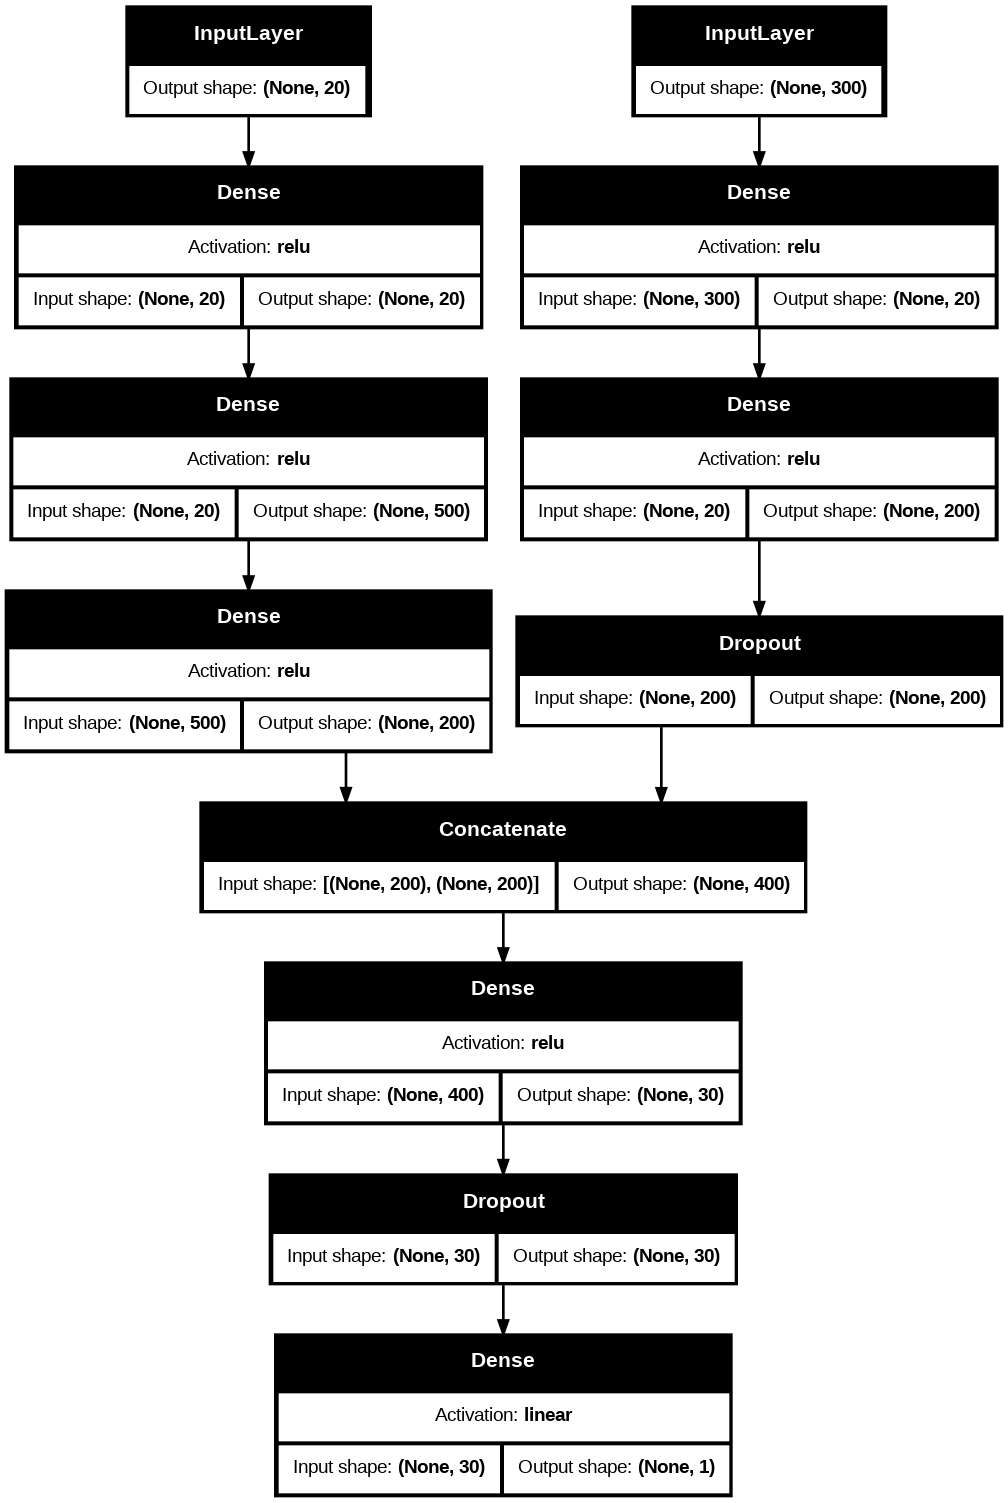

In [ ]:
# Посмотроим схему сети
utils.plot_model(model, dpi=96, show_shapes=True, show_layer_activations=True)

# Обучение модели

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-5), loss='mse', metrics=['mae'])

history = model.fit([x_train_scaled[1854:], x_train_model[1854:]],
                    y_train_scaled[1854:],
                    batch_size=64,
                    epochs=100,
                    validation_data=([x_train_scaled[:1854], x_train_model[:1854]], y_train_scaled[:1854]),
                    verbose=1)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 438ms/step - loss: 1.5891 - mae: 1.2505 - val_loss: 0.8609 - val_mae: 0.7416
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 1.5708 - mae: 1.2431 - val_loss: 0.8706 - val_mae: 0.7443
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.5450 - mae: 1.2322 - val_loss: 0.8808 - val_mae: 0.7470
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.5176 - mae: 1.2212 - val_loss: 0.8914 - val_mae: 0.7499
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.4604 - mae: 1.1975 - val_loss: 0.9027 - val_mae: 0.7529
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.4266 - mae: 1.1835 - val_loss: 0.9145 - val_mae: 0.7561
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.4069 - mae: 1.1738 - val_loss: 0.9269 - val_mae: 0.7595
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.3827 - mae: 1.1638 - val_loss: 0.9400 - val_mae: 0.7632
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.3125 - mae:

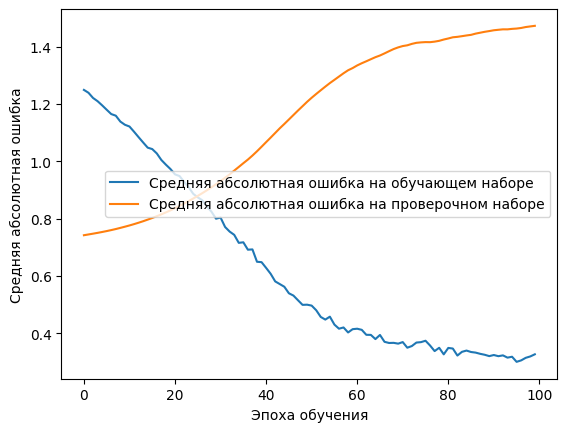

In [ ]:
plt.plot(history.history['mae'], label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Средняя абсолютная ошибка: 0.0433254942035675 

Реальное значение:   1.25  Предсказанное значение:   1.27  Разница:   0.02
Реальное значение:   1.25  Предсказанное значение:   1.25  Разница:   0.00
Реальное значение:   1.25  Предсказанное значение:   1.28  Разница:   0.03
Реальное значение:   1.25  Предсказанное значение:   1.31  Разница:   0.06
Реальное значение:   1.25  Предсказанное значение:   1.28  Разница:   0.03
Реальное значение:   1.26  Предсказанное значение:   1.20  Разница:   0.06
Реальное значение:   1.26  Предсказанное значение:   1.47  Разница:   0.21
Реальное значение:   1.26  Предсказанное значение:   1.39  Разница:   0.13
Реальное значение:   1.26  Предсказанное значение:   1.34  Разница:   0.08
Реальное значение:   1.26  Предсказанное значение:   1.35  Разница:   0.09


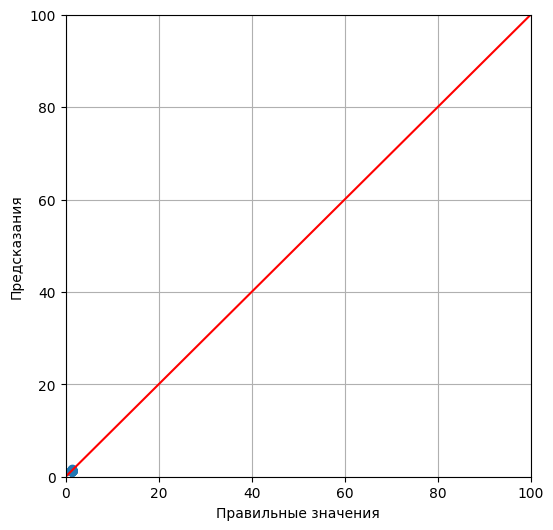

In [ ]:
pred = model.predict([x_train_scaled[1854:1954], x_train_model[1854:1954]])

pred = y_scaler.inverse_transform(pred)    # Обратная нормированию процедура

print('Средняя абсолютная ошибка:', mean_absolute_error(pred, y_train[1854:1954]), '\n') # расчет средней абсолютной ошибки

for i in range(10):
    print('Реальное значение: {:6.2f}  Предсказанное значение: {:6.2f}  Разница: {:6.2f}'.format(y_train[1854:1954][i, 0],
                                                                                                pred[i, 0],
                                                                                                abs(y_train[1854:1954][i, 0] - pred[i, 0])))
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(y_train[1854:1954], pred)          # Отрисовка точечного графика
ax.set_xlim(0, 100)                           # Ограничение оси по x
ax.set_ylim(0, 100)                           # Ограничение оси по x
ax.plot(plt.xlim(), plt.ylim(), 'r')          # Отрисовка диагональной линии
plt.xlabel('Правильные значения')
plt.ylabel('Предсказания')
plt.grid()
plt.show()

In [ ]:
# Рассчитаем средний процент ошибки на проверочной выборке
MEAN_ERROR = (mean_absolute_error(pred, y_train[1854:1954]) * 1000)/(cars['price']).mean() * 100

print(f'Cредний процент ошибки на проверочной выборке: {MEAN_ERROR:.2f}%')

Cредний процент ошибки на проверочной выборке: 4.46%
